#  Boxplot of Reco for Dry Days vs 95th Percentile Rainfall

In [ ]:
%pip install seaborn matplotlib pandas scipy


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import os   
import sys
import glob


In [9]:
from scipy.stats import ttest_ind

In [11]:
# Step 2: Load Excel files from the Data folder
data_kap = pd.read_excel("KE_KAP_daily_NEE_RECO_GPP.xlsx")
data_aus = pd.read_excel("KE_AUS_daily_NEE_RECO_GPP.xlsx")

In [12]:
# Step 3: Compute 95th percentile of rainfall
ppt_95th_kap = data_kap['PPT'].quantile(0.95)
ppt_95th_aus = data_aus['PPT'].quantile(0.95)

In [13]:
# Step 4: Filter data based on rainfall conditions
high_kap = data_kap[data_kap['PPT'] > ppt_95th_kap]
high_aus = data_aus[data_aus['PPT'] > ppt_95th_aus]

dry_kap = data_kap[data_kap['PPT'] == 0]
dry_aus = data_aus[data_aus['PPT'] == 0]

In [14]:
# Step 5: Create dataframes for boxplots
df_high = pd.DataFrame({
    'Reco': pd.concat([high_kap['Reco_r'], high_aus['Reco_a']], ignore_index=True),
    'System': ['Rangeland'] * len(high_kap) + ['Cropland'] * len(high_aus),
    'Group': ['HighRain'] * (len(high_kap) + len(high_aus))
})

df_dry = pd.DataFrame({
    'Reco': pd.concat([dry_kap['Reco_r'], dry_aus['Reco_a']], ignore_index=True),
    'System': ['Rangeland'] * len(dry_kap) + ['Cropland'] * len(dry_aus),
    'Group': ['Dry'] * (len(dry_kap) + len(dry_aus))
})

df_all = pd.concat([df_dry, df_high], ignore_index=True)

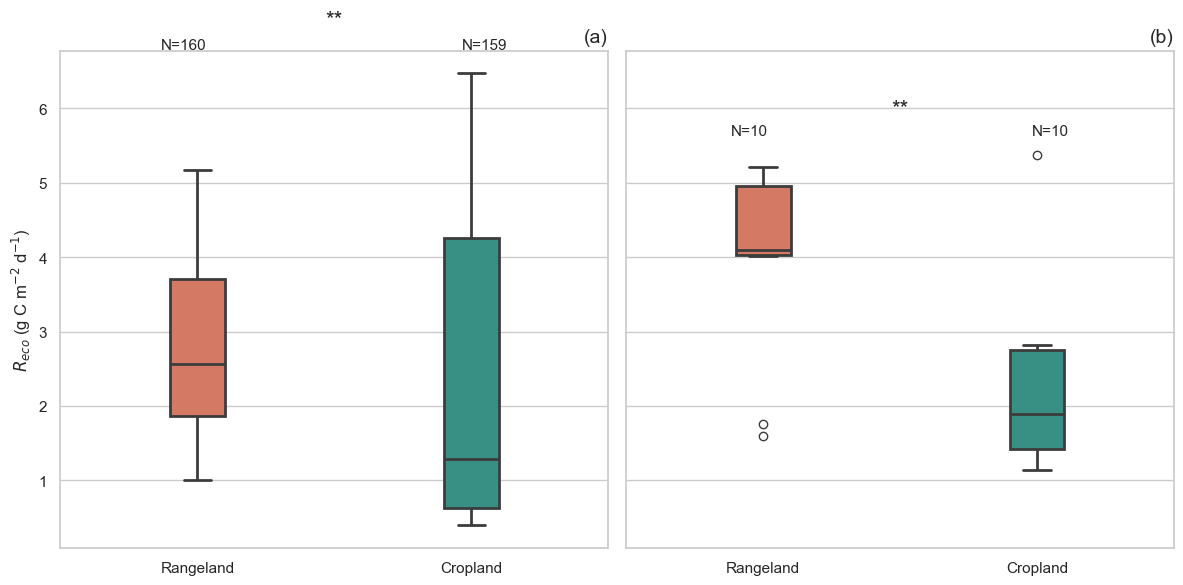

In [ ]:
# Step 6: Plotting the dual-panel boxplot
#sns.set(style="whitegrid")
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

colors = {'Rangeland': '#e76f51', 'Cropland': '#2a9d8f'}

# Panel (a): Dry period
#sns.boxplot(data=df_dry, x='System', y='Reco', hue='System',
 #          ax=axes[0], palette=colors, linewidth=2, width=0.2, legend=False)
sns.boxplot(data=df_dry, x='System', y='Reco', ax=axes[0], palette=colors, linewidth=2, width=0.2)
axes[0].set_title('(a)', loc='right', fontsize=14)
axes[0].set_ylabel(r'$R_{eco}$ (g C m$^{-2}$ d$^{-1}$)', fontsize=12)
axes[0].set_xlabel('')
axes[0].text(-0.05, df_dry['Reco'].max()*1.05, f"N={len(dry_kap)}", ha='center', fontsize=11)
axes[0].text(1.05, df_dry['Reco'].max()*1.05, f"N={len(dry_aus)}", ha='center', fontsize=11)
_, pval_dry = ttest_ind(dry_kap['Reco_r'], dry_aus['Reco_a'], equal_var=False)
axes[0].text(0.5, df_dry['Reco'].max()*1.1, '**' if pval_dry < 0.01 else 'ns', ha='center', fontsize=16)

# Panel (b): High rainfall
#sns.boxplot(data=df_high, x='System', y='Reco', hue='System',
 #          ax=axes[1], palette=colors, linewidth=2, width=0.2, legend=False)
sns.boxplot(data=df_high, x='System', y='Reco', ax=axes[1], palette=colors, linewidth=2, width=0.2)
axes[1].set_title('(b)', loc='right', fontsize=14)
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].text(-0.05, df_high['Reco'].max()*1.05, f"N={len(high_kap)}", ha='center', fontsize=11)
axes[1].text(1.05, df_high['Reco'].max()*1.05, f"N={len(high_aus)}", ha='center', fontsize=11)
_, pval_high = ttest_ind(high_kap['Reco_r'], high_aus['Reco_a'], equal_var=False)
axes[1].text(0.5, df_high['Reco'].max()*1.1, '**' if pval_high < 0.01 else 'ns', ha='center', fontsize=16)

plt.tight_layout()
plt.show()